# Averaged Artifact Substraction with EEG Data
## First step prepare Jupyter Notebook

In [1]:
import os
from FACET.Facet import Facet
os.getcwd()
os.chdir(os.path.dirname(os.path.abspath("__file__")))

eegDataSet = "F:\EEG Datasets\openneuro\FMRIWITHMOTION"
#eegDataSet = "C:\\Users\\janik\\Downloads\\FMRIB_Data.set\\eegNiazy.edf"

f = Facet()


## Second Step import EEG Data

In [2]:
f.import_from_bids(bids_path=eegDataSet,rel_trig_pos=-5.9,upsampling_factor=1, bads=['EMG', 'ECG'], subject="xp101", session=None,task="eegfmriNF")
eeg = f.get_EEG()
#print channels
print(eeg["raw"].ch_names)

f.plot_EEG(title="after import")

Importing EEG with:
Channels ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'POz', 'ECG', 'F1', 'F2', 'C1', 'C2', 'P1', 'P2', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'AF7', 'AF8', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'FT9', 'FT10', 'Fpz', 'CPz']
Time Start: 0.0s
Time End: 448.8798s
Number of Samples: 2244400
Sampling Frequency: 5000.0Hz
F:\EEG Datasets\openneuro\FMRIWITHMOTION
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'POz', 'ECG', 'F1', 'F2', 'C1', 'C2', 'P1', 'P2', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'AF7', 'AF8', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'FT9', 'FT10', 'Fpz', 'C

## Third Step Preprocessing

In [3]:
f.pre_processing()


Applying highpassfilter
Upsampling Data


## Fourth Step find triggers

In [4]:
print()
eeg = f.get_EEG()
#print events
f.find_triggers(r'\bResponse\b', idx=0) # Using Niazys data
eeg = f.get_EEG()
#print triggers
print(eeg["triggers"])
#f.cut()

#f.find_triggers(r'.*TR.*') # Using Fischmeisters data


No Stim-Channels found.

{'New Segment/': 99999, 'Response/R128': 1128, 'Stimulus/S  2': 2, 'Stimulus/S 99': 99}
Channels after find trigger: ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'POz', 'ECG', 'F1', 'F2', 'C1', 'C2', 'P1', 'P2', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'AF7', 'AF8', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'FT9', 'FT10', 'Fpz', 'CPz']
finding triggers
[149804, 159804, 169804, 179804, 189804, 199804, 209804, 219804, 229804, 239804, 249804, 259804, 269804, 279804, 289804, 299804, 309804, 319804, 329804, 339804, 349804, 359804, 369804, 379804, 389804, 399804, 409804, 419804, 429804, 439804, 449804, 459804, 469804, 479804, 489804, 499804, 509804, 519804, 529804, 539804, 549804, 559804, 569804, 579804, 589804, 599804, 609804, 619804, 629804, 639804, 649804, 659804, 66

## Fourth step apply AAS

In [5]:
f.apply_Moosmann(file_path="d_sub-xp101_task-eegfmriNF_headmotion.tsv", threshold=0.8)

Averaging Channel Fp1 
Averaging Channel Fp2 
Averaging Channel F3 
Averaging Channel F4 
Averaging Channel C3 
Averaging Channel C4 
Averaging Channel P3 
Averaging Channel P4 
Averaging Channel O1 
Averaging Channel O2 
Averaging Channel F7 
Averaging Channel F8 
Averaging Channel T7 
Averaging Channel T8 
Averaging Channel P7 
Averaging Channel P8 
Averaging Channel Fz 
Averaging Channel Cz 
Averaging Channel Pz 
Averaging Channel Oz 
Averaging Channel FC1 
Averaging Channel FC2 
Averaging Channel CP1 
Averaging Channel CP2 
Averaging Channel FC5 
Averaging Channel FC6 
Averaging Channel CP5 
Averaging Channel CP6 
Averaging Channel TP9 
Averaging Channel TP10 
Averaging Channel POz 
Averaging Channel F1 
Averaging Channel F2 
Averaging Channel C1 
Averaging Channel C2 
Averaging Channel P1 
Averaging Channel P2 
Averaging Channel AF3 
Averaging Channel AF4 
Averaging Channel FC3 
Averaging Channel FC4 
Averaging Channel CP3 
Averaging Channel CP4 
Averaging Channel PO3 
Averaging C

## Fifth step Remove Artifacts

Removing Artifact from Channel 0 
Removing Artifact from Channel 1 
Removing Artifact from Channel 2 
Removing Artifact from Channel 3 
Removing Artifact from Channel 4 
Removing Artifact from Channel 5 
Removing Artifact from Channel 6 
Removing Artifact from Channel 7 
Removing Artifact from Channel 8 
Removing Artifact from Channel 9 
Removing Artifact from Channel 10 
Removing Artifact from Channel 11 
Removing Artifact from Channel 12 
Removing Artifact from Channel 13 
Removing Artifact from Channel 14 
Removing Artifact from Channel 15 
Removing Artifact from Channel 16 
Removing Artifact from Channel 17 
Removing Artifact from Channel 18 
Removing Artifact from Channel 19 
Removing Artifact from Channel 20 
Removing Artifact from Channel 21 
Removing Artifact from Channel 22 
Removing Artifact from Channel 23 
Removing Artifact from Channel 24 
Removing Artifact from Channel 25 
Removing Artifact from Channel 26 
Removing Artifact from Channel 27 
Removing Artifact from Channel

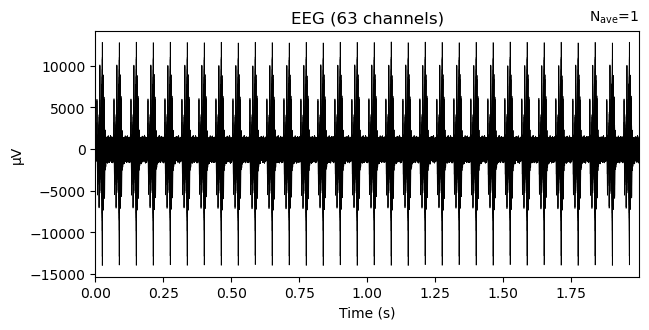

['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'POz', 'ECG', 'F1', 'F2', 'C1', 'C2', 'P1', 'P2', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'AF7', 'AF8', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'FT9', 'FT10', 'Fpz', 'CPz']
[149804, 159804, 169804, 179804, 189804, 199804, 209804, 219804, 229804, 239804, 249804, 259804, 269804, 279804, 289804, 299804, 309804, 319804, 329804, 339804, 349804, 359804, 369804, 379804, 389804, 399804, 409804, 419804, 429804, 439804, 449804, 459804, 469804, 479804, 489804, 499804, 509804, 519804, 529804, 539804, 549804, 559804, 569804, 579804, 589804, 599804, 609804, 619804, 629804, 639804, 649804, 659804, 669804, 679804, 689804, 699804, 709804, 719804, 729804, 739804, 749804, 759804, 769804, 779804, 789804, 799804, 809804, 819804, 829804, 839804, 849804, 859804, 86

In [6]:
f.remove_artifacts( )
eeg = f.get_EEG()
#print triggers
print(eeg["triggers"])



## Sixth step Post-Processing

In [7]:
f.downsample()
f.plot_EEG( title="after downsampling")
f.lowpass(h_freq=40)

Downsampling Data
Applying lowpassfilter


## Seventh display the processed eeg data

In [8]:
f.plot_EEG(title="after lowpass")
#f.export_EEG("Moosmann_cleaned.edf")

## Eighth Evaluate Results

No Stim-Channels found.

{'New Segment/': 99999, 'Response/R128': 1128, 'Stimulus/S  2': 2, 'Stimulus/S 99': 99}
Channels after find trigger: ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'POz', 'ECG', 'F1', 'F2', 'C1', 'C2', 'P1', 'P2', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'AF7', 'AF8', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'FT9', 'FT10', 'Fpz', 'CPz']
finding triggers
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'POz', 'ECG', 'F1', 'F2', 'C1', 'C2', 'P1', 'P2', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'AF7', 'AF8', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'FT9', 'FT10', 'Fpz', 'CPz']

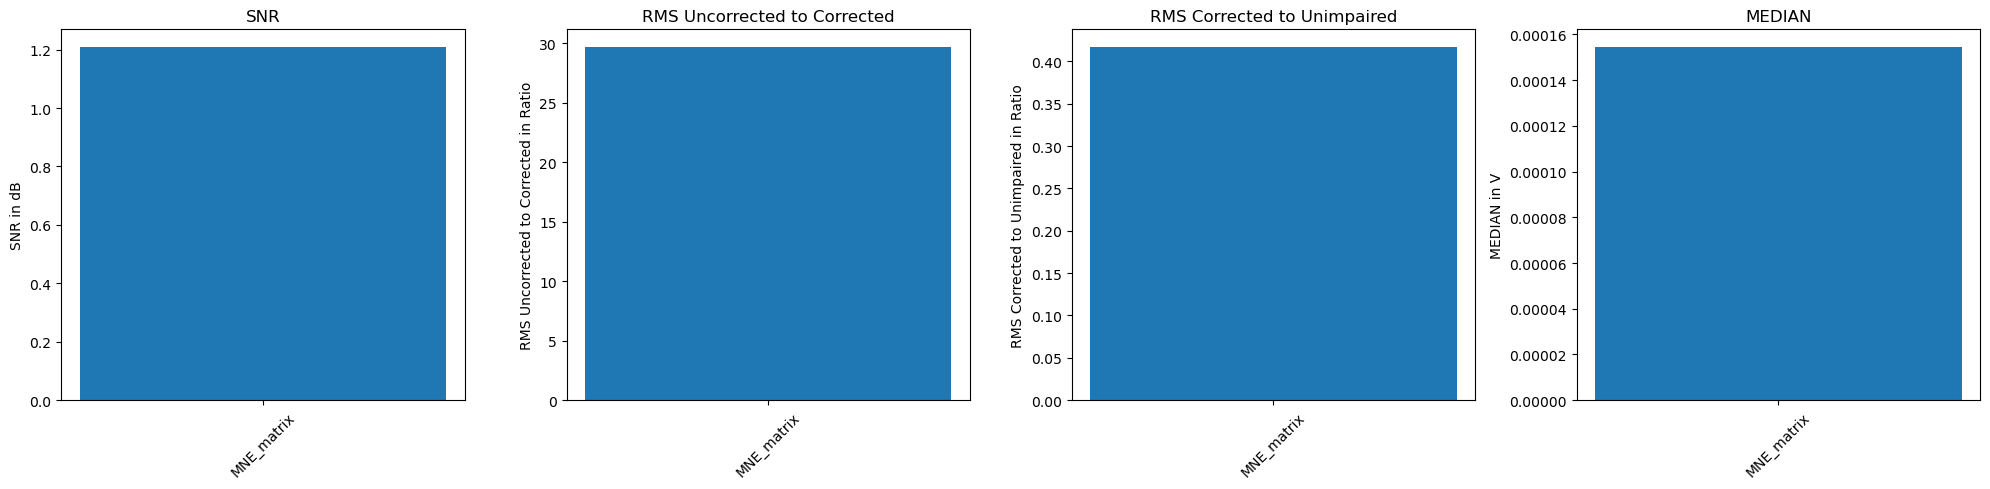

[{'Measure': 'SNR', 'Values': [1.2091029683445544], 'Unit': 'dB'}, {'Measure': 'RMS Uncorrected to Corrected', 'Values': [29.67633242331014], 'Unit': 'Ratio'}, {'Measure': 'RMS Corrected to Unimpaired', 'Values': [0.416905031010095], 'Unit': 'Ratio'}, {'Measure': 'MEDIAN', 'Values': [0.0001545324843893685], 'Unit': 'V'}]


In [9]:
f.find_triggers(r'\bResponse\b') # Using Niazys data
eeg_python = f.get_eeg()
f.add_to_evaluate(eeg_python, name="MNE_matrix") # Matrix will result in >1.0 RMS2 because of python mne inaccuracies



results = f.evaluate(plot=True,measures=["SNR", "RMS", "RMS2", "MEDIAN"])
print(results)

